# HR ATTRITION ANALYSIS

#### High employee turnover rate has never been fun for a company to have. After spending a significant amount of fund in benefits, trainings, and other activity based costs, a company cannot really force the employees to stay. Recruiting new employees is the only way to keep the business going, but it is not cheap. The worst thing about losing employees is not knowing the reason behind it. Without knowing the reason, recruiting more employees will be useless and ended up losing money even more. 

#### This analysis will show how we can analyze the attrition rate of employees in a company and present it using ggplot charts. To make this easier to understand, I have divided the analysis into four parts that explains each function. 

## PART 1 - PREPARATION
### SUMMARY

Before making the analysis, we need to make sure we have all the required libraries for this analysis. For this analysis, we will be using "caret" package, "ggplot" package, "ggcorrplot" package, and "pROC" package.

- "caret"      = used primarily for Regression and Classification to narrow down the model training process. 

- "ggplot"     = provides customizable plots to map variable to aesthetic.

- "ggcorrplot" = can be used to visualize the correlation matrix using ggplot function.

- "pROC"       = tools for visualizing, smoothing and comparing receiver operating characteristic (ROC curves).

In [1]:
# Install and load the appropriate libraries

shh <- suppressPackageStartupMessages # Silent the function warnings
shh(library(caret))
shh(library(ggplot2))
shh(library(ggcorrplot))
shh(library(pROC))


Next, I am going to load the "csv file" of our dataset from the company. I uploaded my csv file to GitHub, an online hosting for software development. The link that I generated for the csv file was lengthy and did not look clean, so I used "bit.ly" service to shorten that lengthy link address.

In [2]:
# Load the CSV file with employee data
hr_data <- read.csv('http://bit.ly/2Mw5pyl')

### DATA EXPLORATION

After loading the csv data, I am going to explore the dataset for this analysis. I need to know the list, description, as well as the first few part of the data. By performing this step, I can be sure that I have the correct dataset.
There are three functions for this step:
1. str = to list and describe the columns
2. head = to see the first few data
3. summary = to know the descriptive statistics of the data

In [3]:
# Lists and describes each of the fields (columns)
str(hr_data)

'data.frame':	1470 obs. of  25 variables:
 $ Attrition              : int  1 0 1 0 0 0 0 0 0 0 ...
 $ EmployeeNumber         : int  1 2 4 5 7 8 10 11 12 13 ...
 $ Age                    : int  41 49 37 33 27 32 59 30 38 36 ...
 $ Gender                 : Factor w/ 2 levels "Female","Male": 1 2 2 1 2 2 1 2 2 2 ...
 $ MaritalStatus          : Factor w/ 3 levels "Divorced","Married",..: 3 2 3 2 2 3 2 1 3 2 ...
 $ Department             : Factor w/ 3 levels "Human Resources",..: 3 2 2 2 2 2 2 2 2 2 ...
 $ JobRole                : Factor w/ 9 levels "Healthcare Representative",..: 8 7 3 7 3 3 3 3 5 1 ...
 $ MonthlyIncome          : int  5993 5130 2090 2909 3468 3068 2670 2693 9526 5237 ...
 $ OverTime               : Factor w/ 2 levels "No","Yes": 2 1 2 2 1 1 2 1 1 1 ...
 $ EducationField         : Factor w/ 6 levels "Human Resources",..: 2 2 5 2 4 2 4 2 2 4 ...
 $ BusinessTravel         : Factor w/ 3 levels "Non-Travel","Travel_Frequently",..: 3 2 3 2 3 2 3 3 2 3 ...
 $ DistanceFromHome   

In [4]:
# Explores the first few records in the dataset.
head(hr_data)

Attrition,EmployeeNumber,Age,Gender,MaritalStatus,Department,JobRole,MonthlyIncome,OverTime,EducationField,...,PerformanceRating,PercentSalaryHike,StockOptionLevel,TrainingTimesLastYear,TotalWorkingYears,NumCompaniesWorked,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1,1,41,Female,Single,Sales,Sales Executive,5993,Yes,Life Sciences,...,3,11,0,0,8,8,6,4,0,5
0,2,49,Male,Married,Research & Development,Research Scientist,5130,No,Life Sciences,...,4,23,1,3,10,1,10,7,1,7
1,4,37,Male,Single,Research & Development,Laboratory Technician,2090,Yes,Other,...,3,15,0,3,7,6,0,0,0,0
0,5,33,Female,Married,Research & Development,Research Scientist,2909,Yes,Life Sciences,...,3,11,0,3,8,1,8,7,3,0
0,7,27,Male,Married,Research & Development,Laboratory Technician,3468,No,Medical,...,3,12,1,3,6,9,2,2,2,2
0,8,32,Male,Single,Research & Development,Laboratory Technician,3068,No,Life Sciences,...,3,13,0,2,8,0,7,7,3,6


In [5]:
# Calculates descriptive statistics for each field.
summary(hr_data)

   Attrition      EmployeeNumber        Age           Gender     MaritalStatus
 Min.   :0.0000   Min.   :   1.0   Min.   :18.00   Female:588   Divorced:327  
 1st Qu.:0.0000   1st Qu.: 491.2   1st Qu.:30.00   Male  :882   Married :673  
 Median :0.0000   Median :1020.5   Median :36.00                Single  :470  
 Mean   :0.1612   Mean   :1024.9   Mean   :36.92                              
 3rd Qu.:0.0000   3rd Qu.:1555.8   3rd Qu.:43.00                              
 Max.   :1.0000   Max.   :2068.0   Max.   :60.00                              
                                                                              
                  Department                       JobRole    MonthlyIncome  
 Human Resources       : 63   Sales Executive          :326   Min.   : 1009  
 Research & Development:961   Research Scientist       :292   1st Qu.: 2911  
 Sales                 :446   Laboratory Technician    :259   Median : 4919  
                              Manufacturing Director   :

## PART 2 - GRAPH DATASET
### SUMMARY

After making sure I have the right dataset, I am going to answer some questions about the correlation between columns and put them in graphs using "ggplot" function. These questions are typically asked by the stakeholders in the company to find out the reason behind the employee turnover. The graphs that I will be presenting not necessarily show causation, but correlation.

### QUESTION 1 - "Does one gender tend to quit more frequently than the other?"

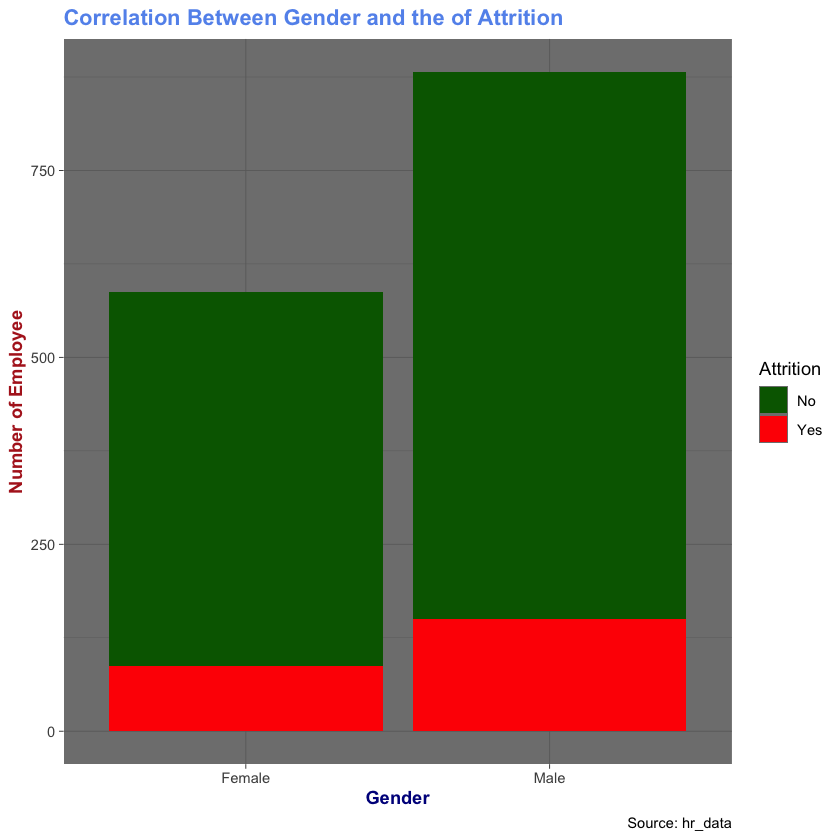

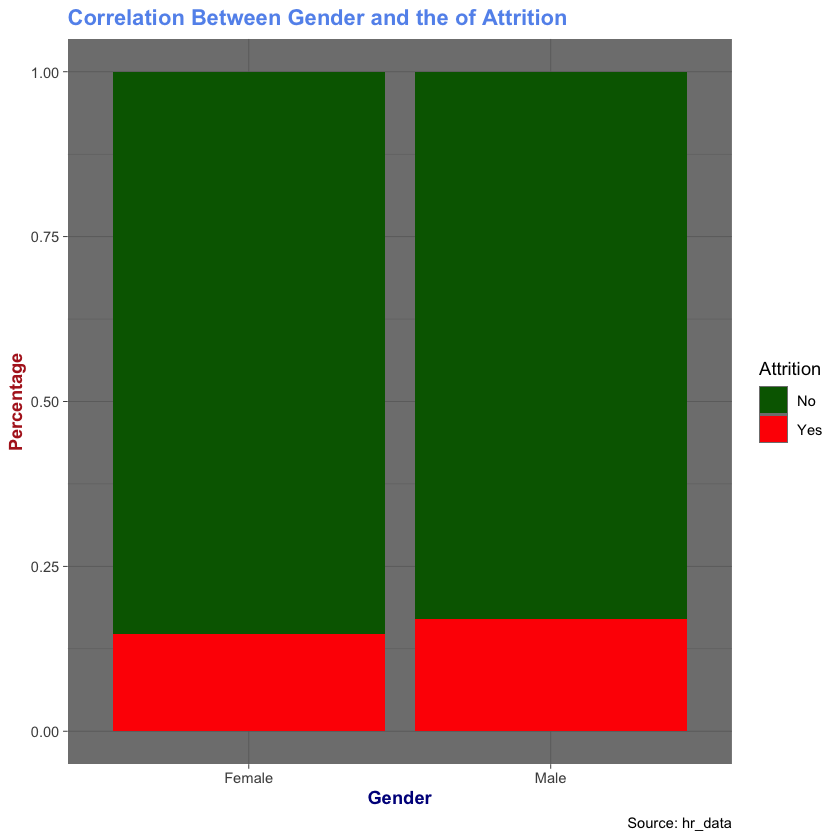

In [6]:
# Correlation Between Gender and the Number of Attrition

Gender <- ggplot(hr_data, aes(Gender, fill=factor(Attrition))) + 
            labs(title="Correlation Between Gender and the of Attrition",     
                 caption="Source: hr_data") +
            scale_fill_manual(values = c("darkgreen","red"),name="Attrition", labels =c ("No","Yes")) +
            theme_dark() +
            theme(plot.title = element_text(face = "bold", colour = "cornflowerblue"), 
            axis.title.x = element_text(face = "bold", colour = "darkblue"),
            axis.title.y = element_text(face = "bold", colour = "firebrick"))
Gender + geom_bar() + xlab("Gender") + ylab("Number of Employee")       
Gender + geom_bar(position = "fill") + xlab("Gender") + ylab("Percentage")

From the chart above, it seems like the number of attrition in male employees are much higher. However, it should be noted that the overall number of male employees is much higher than female. The realitiy is the gender does not significantly affect the number of attrition 

### QUESTION 2 - "Does age appear to make a difference? Are our younger workers less committed to our company?"

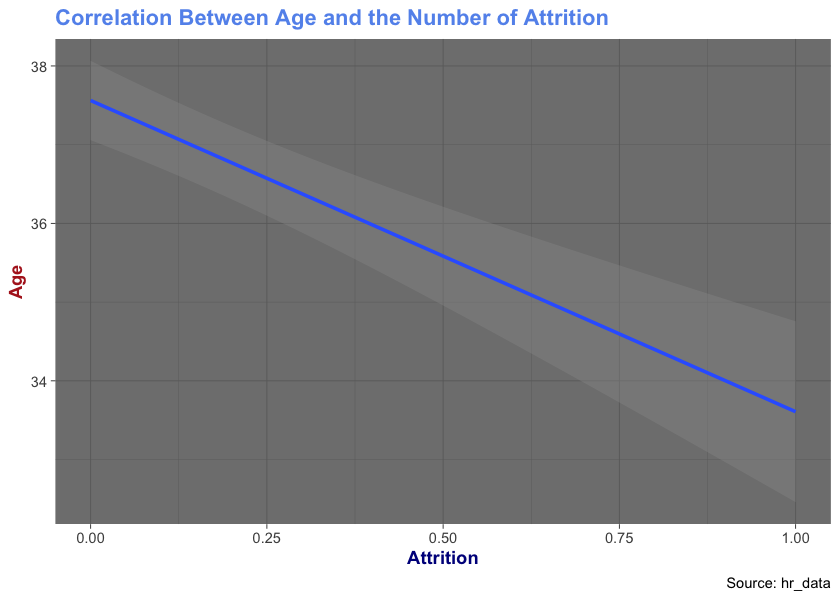

In [29]:
# Correlation Between Gender and the Number of Attrition
Age <- ggplot(hr_data, aes(Attrition, Age)) +
       labs(title="Correlation Between Age and the Number of Attrition",     
            caption="Source: hr_data") +
            theme_dark() +
            scale_fill_manual(name="Attrition", labels =c("No","Yes")) +
            theme(plot.title = element_text(face = "bold", colour = "cornflowerblue"), 
            axis.title.x = element_text(face = "bold", colour = "darkblue"),
            axis.title.y = element_text(face = "bold", colour = "firebrick"))

Age + geom_smooth(method = "gam")


### QUESTION 3 - "Correlation Between Overtime and the of Attrition?"

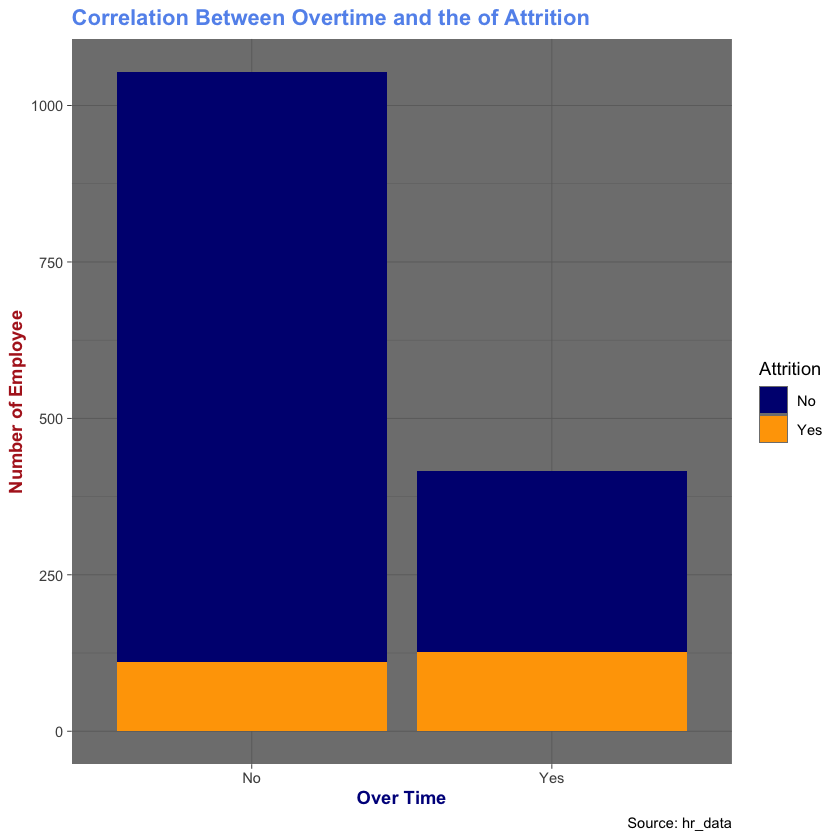

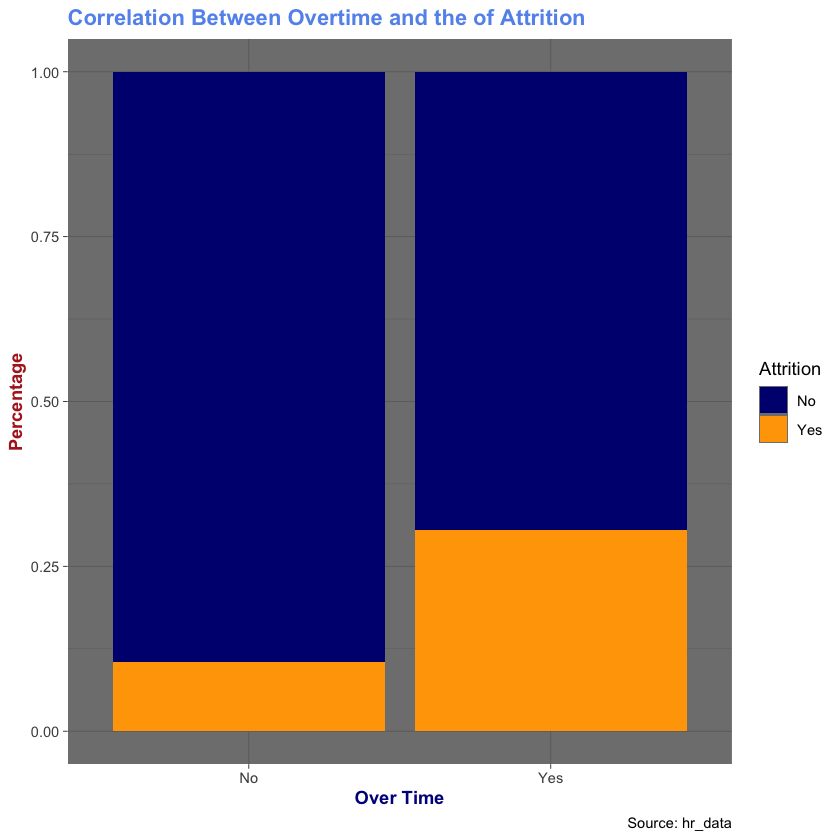

In [8]:
OT <- ggplot(hr_data, aes(OverTime, fill=factor(Attrition))) + 
            labs(title="Correlation Between Overtime and the of Attrition",     
                 caption="Source: hr_data") +
            scale_fill_manual(values = c("navy","orange"),name="Attrition", labels =c ("No","Yes")) +
            theme_dark() +
            theme(plot.title = element_text(face = "bold", colour = "cornflowerblue"), 
            axis.title.x = element_text(face = "bold", colour = "darkblue"),
            axis.title.y = element_text(face = "bold", colour = "firebrick"))
OT + geom_bar() + xlab("Over Time") + ylab("Number of Employee")       
OT + geom_bar(position = "fill") + xlab("Over Time") + ylab("Percentage")

## PART 3 - PREPARE DATA FOR MODELING
### SUMMARY

The next thing that we want to do is to make sure we don't have empty data in our dataset.

In [9]:
# Sum number of rows that has no value
sum(is.na(hr_data))

[1] 0

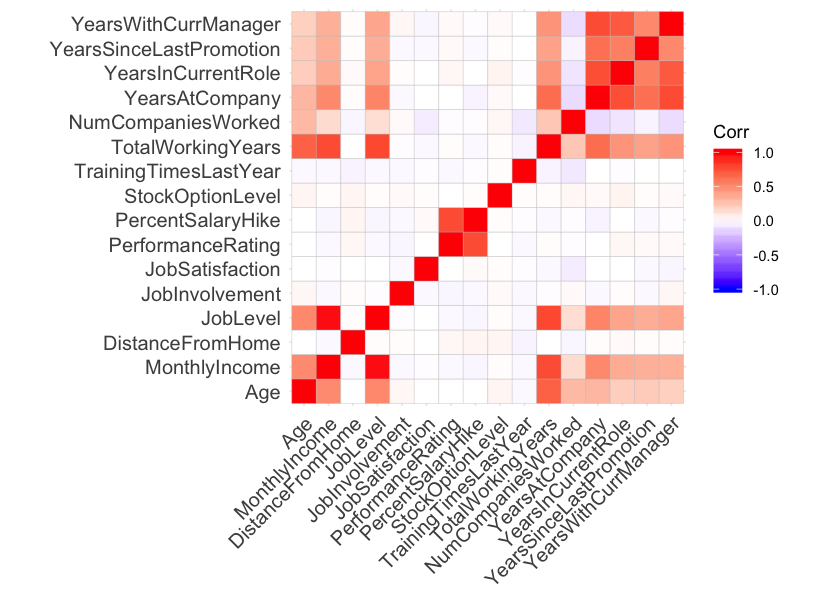

In [10]:
cor <- cor(hr_data[c(3,8,12:25)])
options(repr.plot.width=7, repr.plot.height=5)
ggcorrplot(cor)

The is.na function shows that there is no data that has no value. Now, we can split our dataset into training data and test data. We are going to do 80/20 randomly in our new training and test data.

In [11]:
# Split data into training and test using randomized method
set.seed(3456)
trainIndex <- createDataPartition(hr_data$Attrition, p = .8, 
                                  list = FALSE, times = 1)
hr_train <- hr_data[ trainIndex,]
hr_test  <- hr_data[-trainIndex,]

In [12]:
head(hr_train)

,Attrition,EmployeeNumber,Age,Gender,MaritalStatus,Department,JobRole,MonthlyIncome,OverTime,EducationField,...,PerformanceRating,PercentSalaryHike,StockOptionLevel,TrainingTimesLastYear,TotalWorkingYears,NumCompaniesWorked,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1,1,1,41,Female,Single,Sales,Sales Executive,5993,Yes,Life Sciences,...,3,11,0,0,8,8,6,4,0,5
2,0,2,49,Male,Married,Research & Development,Research Scientist,5130,No,Life Sciences,...,4,23,1,3,10,1,10,7,1,7
3,1,4,37,Male,Single,Research & Development,Laboratory Technician,2090,Yes,Other,...,3,15,0,3,7,6,0,0,0,0
5,0,7,27,Male,Married,Research & Development,Laboratory Technician,3468,No,Medical,...,3,12,1,3,6,9,2,2,2,2
6,0,8,32,Male,Single,Research & Development,Laboratory Technician,3068,No,Life Sciences,...,3,13,0,2,8,0,7,7,3,6
7,0,10,59,Female,Married,Research & Development,Laboratory Technician,2670,Yes,Medical,...,4,20,3,3,12,4,1,0,0,0


## PART 4 - BUILDING AND EVALUATING A MODEL TO PREDICT ATTRITION
### SUMMARY

It looks good! The Employee Number in our training data is random. Now, we can start building our new model to predict our attrition. We will be using logistic regression or glm function for this process.

We are going to start with our initial model. I put all the columns to see which columns are statistically significant. We will choose a couple of columns that have the lowest variants.

Techniques we can use are GLM, RandomForest, or RPART. For this specific project, Random Forest will gice more complication, so we will cross that out.

### METHOD 1 - LOGISTIC REGRESSION

In [13]:
# Build a model with the training data that predicts Attrition using logistic regression
# Initial Build
hr_model_lm_1 <- glm(Attrition ~ ., 
                   data=hr_train, family=binomial)
summary(hr_model_lm_1)


Call:
glm(formula = Attrition ~ ., family = binomial, data = hr_train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.6846  -0.5176  -0.2854  -0.0960   3.3513  

Coefficients:
                                   Estimate Std. Error z value Pr(>|z|)    
(Intercept)                      -1.264e+01  4.206e+02  -0.030  0.97603    
EmployeeNumber                   -1.498e-04  1.612e-04  -0.929  0.35278    
Age                              -3.669e-02  1.448e-02  -2.534  0.01127 *  
GenderMale                        4.078e-01  1.954e-01   2.087  0.03689 *  
MaritalStatusMarried              1.889e-01  2.836e-01   0.666  0.50532    
MaritalStatusSingle               9.045e-01  3.658e-01   2.473  0.01341 *  
DepartmentResearch & Development  1.232e+01  4.206e+02   0.029  0.97662    
DepartmentSales                   1.206e+01  4.206e+02   0.029  0.97713    
JobRoleHuman Resources            1.336e+01  4.206e+02   0.032  0.97467    
JobRoleLaboratory Technician      1.383

#### We are done building our model using every variable. We can see the importance of each variable by looking at the P-Value and the asterisks on the right side. However, this will not be very practical to do if we have incredibly large dataset. What we can do is to rank the importance using varImp function.

In [14]:
varImp(hr_model_lm_1)

,Overall
EmployeeNumber,0.92921463
Age,2.53429539
GenderMale,2.08695569
MaritalStatusMarried,0.66614583
MaritalStatusSingle,2.47277570
DepartmentResearch & Development,0.02930356
DepartmentSales,0.02866861
JobRoleHuman Resources,0.03175385
JobRoleLaboratory Technician,2.80182401
JobRoleManager,0.01906591


After doing some trials, I came out with two variables. We will go ahead and use these two variables in our final model.

In [15]:
hr_model_lm <- glm(Attrition ~ OverTime +
                      JobInvolvement, 
                       data=hr_train, family=binomial)
summary(hr_model_lm)


Call:
glm(formula = Attrition ~ OverTime + JobInvolvement, family = binomial, 
    data = hr_train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.2000  -0.5580  -0.4442  -0.4442   2.3719  

Coefficients:
               Estimate Std. Error z value Pr(>|z|)    
(Intercept)     -0.8114     0.2960  -2.741  0.00613 ** 
OverTimeYes      1.3493     0.1620   8.329  < 2e-16 ***
JobInvolvement  -0.4849     0.1082  -4.480 7.47e-06 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 1078.81  on 1175  degrees of freedom
Residual deviance:  988.58  on 1173  degrees of freedom
AIC: 994.58

Number of Fisher Scoring iterations: 4


Everything looks good! Now, we will use the final model to predict our Attrition. We will use predict function for this step.

In [16]:
# Predict “attrition” for customers in the test data
hr_test$Attrition_pred_lm <- predict(hr_model_lm, newdata=hr_test, type="response")
head(hr_test)

,Attrition,EmployeeNumber,Age,Gender,MaritalStatus,Department,JobRole,MonthlyIncome,OverTime,EducationField,...,PercentSalaryHike,StockOptionLevel,TrainingTimesLastYear,TotalWorkingYears,NumCompaniesWorked,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition_pred_lm
4,0,5,33,Female,Married,Research & Development,Research Scientist,2909,Yes,Life Sciences,...,11,0,3,8,1,8,7,3,0,0.28560413
9,0,12,38,Male,Single,Research & Development,Manufacturing Director,9526,No,Life Sciences,...,21,0,2,10,0,9,7,1,8,0.14415413
19,0,23,53,Female,Married,Sales,Manager,15427,No,Life Sciences,...,16,0,3,31,2,25,8,3,7,0.14415413
20,0,24,38,Male,Single,Research & Development,Research Scientist,3944,Yes,Life Sciences,...,11,0,3,6,5,3,2,1,2,0.28560413
31,0,39,33,Male,Single,Research & Development,Laboratory Technician,2496,No,Medical,...,11,0,3,7,4,1,1,0,0,0.09396704
32,0,40,44,Male,Married,Research & Development,Healthcare Representative,6465,Yes,Other,...,13,0,5,9,2,4,2,1,3,0.28560413


In [30]:
# Write a new csv
write.csv(hr_test, "hr_attrition_prediction_lm.csv")

### METHOD 2 - RANDOM FOREST

In [18]:
# Enable Appropriate Library
shh(library("randomForest"))

In [36]:
# Create a classification model using the "randomForest" function
shh(hr_model_rf_1 <- randomForest(Attrition ~ ., data = hr_train, importance=TRUE, ntree=2000))
summary(hr_model_rf_1)
varImp(hr_model_rf_1)

Warning message in randomForest.default(m, y, ...):
“The response has five or fewer unique values.  Are you sure you want to do regression?”

                Length Class  Mode     
call               5   -none- call     
type               1   -none- character
predicted       1176   -none- numeric  
mse             2000   -none- numeric  
rsq             2000   -none- numeric  
oob.times       1176   -none- numeric  
importance        48   -none- numeric  
importanceSD      24   -none- numeric  
localImportance    0   -none- NULL     
proximity          0   -none- NULL     
ntree              1   -none- numeric  
mtry               1   -none- numeric  
forest            11   -none- list     
coefs              0   -none- NULL     
y               1176   -none- numeric  
test               0   -none- NULL     
inbag              0   -none- NULL     
terms              3   terms  call     

,Overall
EmployeeNumber,-0.5954108
Age,28.6762302
Gender,3.1836879
MaritalStatus,19.6509587
Department,5.5068290
JobRole,26.1664970
MonthlyIncome,30.2501671
OverTime,55.9670900
EducationField,3.8621360
BusinessTravel,5.0049789


Warning message in randomForest.default(m, y, ...):
“The response has five or fewer unique values.  Are you sure you want to do regression?”

                Length Class  Mode     
call               4   -none- call     
type               1   -none- character
predicted       1176   -none- numeric  
mse              500   -none- numeric  
rsq              500   -none- numeric  
oob.times       1176   -none- numeric  
importance         8   -none- numeric  
importanceSD       4   -none- numeric  
localImportance    0   -none- NULL     
proximity          0   -none- NULL     
ntree              1   -none- numeric  
mtry               1   -none- numeric  
forest            11   -none- list     
coefs              0   -none- NULL     
y               1176   -none- numeric  
test               0   -none- NULL     
inbag              0   -none- NULL     
terms              3   terms  call     

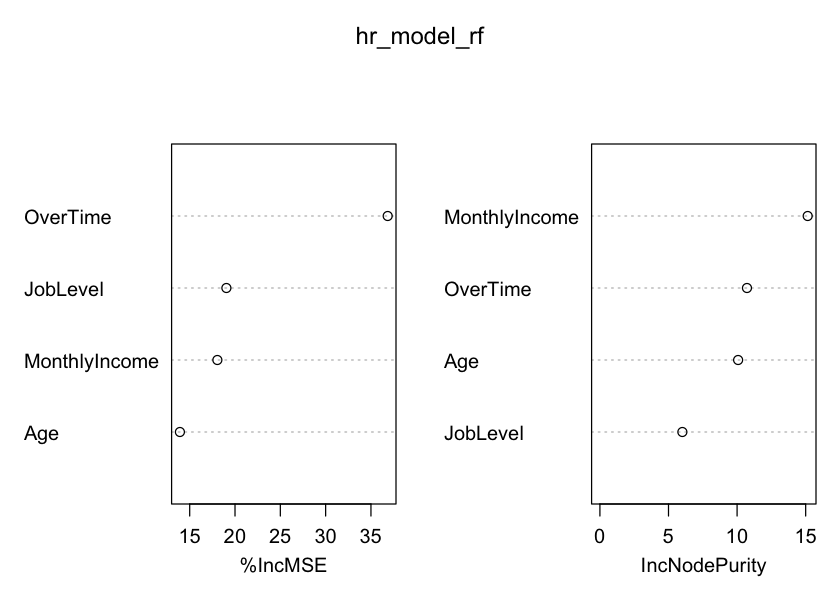

In [35]:
# Final Model
shh(hr_model_rf <- randomForest(Attrition ~ Age + MonthlyIncome + OverTime + JobLevel, data=hr_train, importance = TRUE))
summary(hr_model_rf)
varImpPlot(hr_model_rf)

In [21]:
# Predict attrition in the test data (Predict Classes)
hr_test$Attrition_pred_rf <- predict(hr_model_rf,
                            newdata=hr_test, type="class")
head(hr_test)
summary(hr_test)
str(hr_test)

,Attrition,EmployeeNumber,Age,Gender,MaritalStatus,Department,JobRole,MonthlyIncome,OverTime,EducationField,...,StockOptionLevel,TrainingTimesLastYear,TotalWorkingYears,NumCompaniesWorked,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition_pred_lm,Attrition_pred_rf
4,0,5,33,Female,Married,Research & Development,Research Scientist,2909,Yes,Life Sciences,...,0,3,8,1,8,7,3,0,0.28560413,0.43803260
9,0,12,38,Male,Single,Research & Development,Manufacturing Director,9526,No,Life Sciences,...,0,2,10,0,9,7,1,8,0.14415413,0.08618604
19,0,23,53,Female,Married,Sales,Manager,15427,No,Life Sciences,...,0,3,31,2,25,8,3,7,0.14415413,0.02873054
20,0,24,38,Male,Single,Research & Development,Research Scientist,3944,Yes,Life Sciences,...,0,3,6,5,3,2,1,2,0.28560413,0.25015649
31,0,39,33,Male,Single,Research & Development,Laboratory Technician,2496,No,Medical,...,0,3,7,4,1,1,0,0,0.09396704,0.17977350
32,0,40,44,Male,Married,Research & Development,Healthcare Representative,6465,Yes,Other,...,0,5,9,2,4,2,1,3,0.28560413,0.15934289


   Attrition     EmployeeNumber        Age           Gender     MaritalStatus
 Min.   :0.000   Min.   :   5.0   Min.   :18.00   Female:108   Divorced: 59  
 1st Qu.:0.000   1st Qu.: 523.5   1st Qu.:30.00   Male  :186   Married :137  
 Median :0.000   Median :1032.5   Median :35.00                Single  : 98  
 Mean   :0.119   Mean   :1063.4   Mean   :36.45                              
 3rd Qu.:0.000   3rd Qu.:1639.8   3rd Qu.:42.00                              
 Max.   :1.000   Max.   :2065.0   Max.   :60.00                              
                                                                             
                  Department                       JobRole   MonthlyIncome  
 Human Resources       : 14   Sales Executive          :69   Min.   : 1200  
 Research & Development:183   Research Scientist       :56   1st Qu.: 2854  
 Sales                 : 97   Laboratory Technician    :53   Median : 4877  
                              Manufacturing Director   :29   Mean   

'data.frame':	294 obs. of  27 variables:
 $ Attrition              : int  0 0 0 0 0 0 0 0 0 0 ...
 $ EmployeeNumber         : int  5 12 23 24 39 40 41 62 63 73 ...
 $ Age                    : int  33 38 53 38 33 44 30 46 35 33 ...
 $ Gender                 : Factor w/ 2 levels "Female","Male": 1 2 1 2 2 2 2 2 2 1 ...
 $ MaritalStatus          : Factor w/ 3 levels "Divorced","Married",..: 2 3 2 3 3 2 3 3 2 3 ...
 $ Department             : Factor w/ 3 levels "Human Resources",..: 2 2 3 2 2 2 2 3 2 2 ...
 $ JobRole                : Factor w/ 9 levels "Healthcare Representative",..: 7 5 4 7 3 1 3 8 3 6 ...
 $ MonthlyIncome          : int  2909 9526 15427 3944 2496 6465 2206 5772 2269 13458 ...
 $ OverTime               : Factor w/ 2 levels "No","Yes": 2 1 1 2 1 2 1 2 1 2 ...
 $ EducationField         : Factor w/ 6 levels "Human Resources",..: 2 2 2 2 4 5 4 3 2 2 ...
 $ BusinessTravel         : Factor w/ 3 levels "Non-Travel","Travel_Frequently",..: 2 2 3 3 3 3 3 2 3 2 ...
 $ DistanceFromH

In [32]:
# Write a new csv
write.csv(hr_test, "hr_attrition_prediction_rf.csv")

### EVALUATION

[1] 0.69

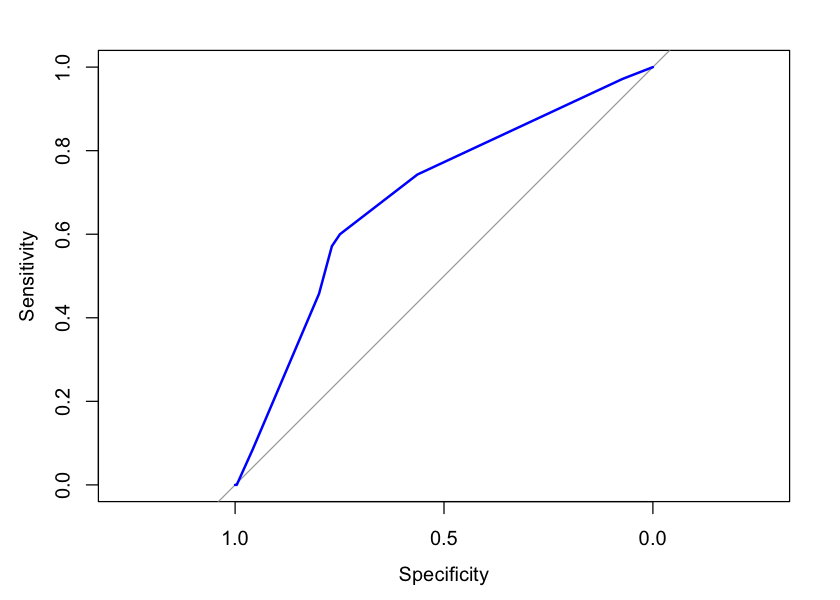

In [22]:

ROC <- roc(hr_test$Attrition, hr_test$Attrition_pred_lm)

plot(ROC, col = "blue", levels=1)

round(auc(ROC),2)

[1] 0.71

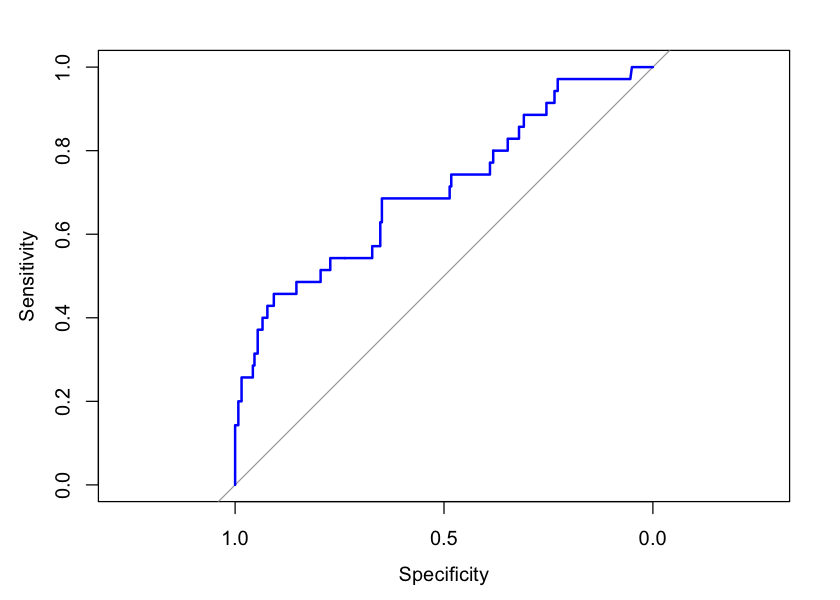

In [23]:
# Convert Attrition from Factor to Integer
ROC_RF <- roc(hr_test$Attrition, hr_test$Attrition_pred_rf)

plot(ROC_RF, col = "blue", levels=1)

round(auc(ROC_RF),2)


### Recommendation
From our new prediction, it shows that the employees with a lot of overtime and high job involvement tend to leave the company. Therefore, the company need to review the workload and job description for the employees.